## **Pipeline concept (Titanic dataset)**

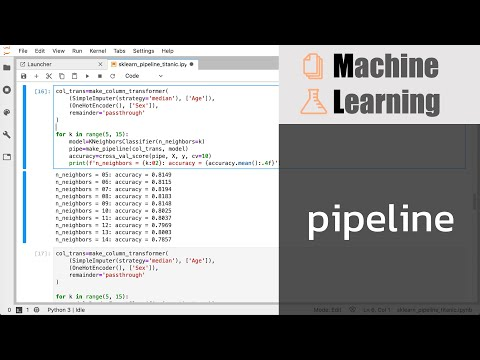

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('caQziky_248', width=720, height=405)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
print(f'pandas version:  {pd.__version__}')
print(f'seaborn version: {sns.__version__}')

pandas version:  1.1.5
seaborn version: 0.11.1


In [4]:
pd.Timestamp.now()

Timestamp('2021-05-17 05:03:47.193293')

In [5]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/titanic_train.csv'
df=pd.read_csv(url)
df[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## **scikit-learn**

In [7]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold

# models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

In [8]:
df[:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [9]:
X=df[['Sex', 'Age', 'SibSp', 'Parch', 'Pclass']]
y=df.Survived

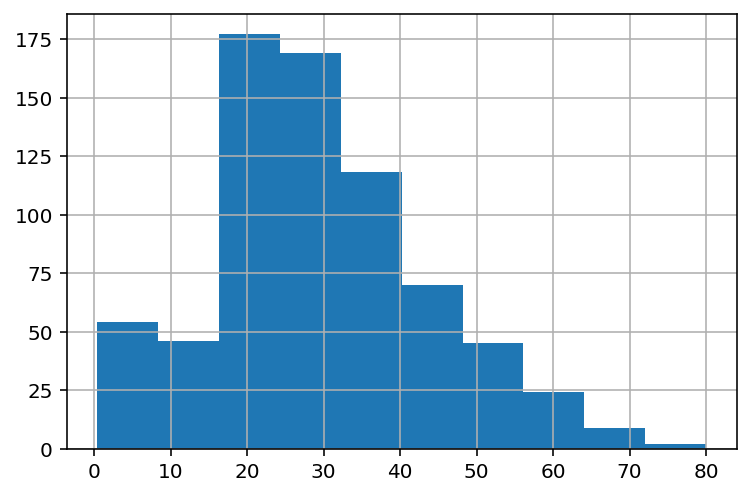

In [10]:
df['Age'].hist()

In [11]:
col_trans=make_column_transformer(
    (SimpleImputer(strategy='median'), ['Age']),
    (OneHotEncoder(), ['Sex']),
    remainder='passthrough'
)
col_trans

ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('simpleimputer',
                                 SimpleImputer(add_indicator=False, copy=True,
                                               fill_value=None,
                                               missing_values=nan,
                                               strategy='median', verbose=0),
                                 ['Age']),
                                ('onehotencoder',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='error',
                                               sparse=True),
                                 ['Sex'])],
                  verbose=False)

In [12]:
model=KNeighborsClassifier()

In [13]:
pipe=make_pipeline(col_trans, model)
pipe

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('simpleimputer',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='median',
                                                                verbose=0),
                                                  ['Age']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(categor

## **cross validation score**

In [14]:
accuracy=cross_val_score(pipe, X, y, cv=10)
print(accuracy)
print(f'accuracy mean {accuracy.mean()}')

[0.76666667 0.80898876 0.74157303 0.85393258 0.85393258 0.79775281
 0.88764045 0.7752809  0.83146067 0.80898876]
accuracy mean 0.812621722846442


## **KNeighborsClassifier(n_neighbors=?)**

In [15]:
col_trans=make_column_transformer(
    (SimpleImputer(strategy='median'), ['Age']),
    (OneHotEncoder(), ['Sex']),
    remainder='passthrough'
)

for k in range(5, 15):
    model=KNeighborsClassifier(n_neighbors=k)    
    pipe=make_pipeline(col_trans, model)
    accuracy=cross_val_score(pipe, X, y, cv=10)
    print(f'n_neighbors = {k:02}: accuracy = {accuracy.mean():.4f}')

n_neighbors = 05: accuracy = 0.8126
n_neighbors = 06: accuracy = 0.8126
n_neighbors = 07: accuracy = 0.8115
n_neighbors = 08: accuracy = 0.8126
n_neighbors = 09: accuracy = 0.8193
n_neighbors = 10: accuracy = 0.8059
n_neighbors = 11: accuracy = 0.8082
n_neighbors = 12: accuracy = 0.7969
n_neighbors = 13: accuracy = 0.8025
n_neighbors = 14: accuracy = 0.7834


## **RandomForestClassifier(n_estimators=?)**

In [16]:
col_trans=make_column_transformer(
    (SimpleImputer(strategy='median'), ['Age']),
    (OneHotEncoder(), ['Sex']),
    remainder='passthrough'
)

for k in range(5, 15):
    model=RandomForestClassifier(n_estimators=k)    
    pipe=make_pipeline(col_trans, model)
    accuracy=cross_val_score(pipe, X, y, cv=10)
    print(f'n_estimators = {k:02}: accuracy = {accuracy.mean():.4f}')


n_estimators = 05: accuracy = 0.8014
n_estimators = 06: accuracy = 0.8026
n_estimators = 07: accuracy = 0.8003
n_estimators = 08: accuracy = 0.7891
n_estimators = 09: accuracy = 0.8003
n_estimators = 10: accuracy = 0.8037
n_estimators = 11: accuracy = 0.7958
n_estimators = 12: accuracy = 0.7992
n_estimators = 13: accuracy = 0.8014
n_estimators = 14: accuracy = 0.8026


## **train_test_split**

In [17]:
col_trans=make_column_transformer(
    (SimpleImputer(strategy='median'), ['Age']),
    (OneHotEncoder(), ['Sex']),
    remainder='passthrough'
)
model=KNeighborsClassifier(n_neighbors=7)
pipe=make_pipeline(col_trans, model)

In [18]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.2, stratify=y)
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8044692737430168

In [19]:
X[:3]

,Sex,Age,SibSp,Parch,Pclass
0,male,22.0,1,0,3
1,female,38.0,1,0,1
2,female,26.0,0,0,3


In [20]:
X_new=pd.DataFrame(
{
    'Sex': ['male', 'female'],
    'Age': [25, 20],
    'SibSp': [1, 2],
    'Parch': [0, 0],
    'Pclass': [1, 3]
})
X_new

,Sex,Age,SibSp,Parch,Pclass
0,male,25,1,0,1
1,female,20,2,0,3


In [21]:
pipe.predict(X_new)

array([0, 1])

In [22]:
pipe.predict_proba(X_new)

array([[0.57142857, 0.42857143],
       [0.42857143, 0.57142857]])

In [23]:
predicted=pipe.predict(X_test)
predicted

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1])

## **scikit-learn: confusion matrix**

$$
\begin{bmatrix}
C_{0,0} &amp; C_{0,1} \\
C_{1,0} &amp; C_{1,1}
\end{bmatrix}
=
\begin{bmatrix}
tn&amp;fp \\
fn&amp;tp
\end{bmatrix}
$$

predicted false	predicted true
actual false	tn	fp
actual true	fn	tp


In [24]:
metrics.confusion_matrix(y_test, predicted)

array([[94, 16],
       [19, 50]])

In [25]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predicted).ravel()

In [26]:
print(f'tn = {tn}')
print(f'fp = {fp}')
print(f'fn = {fn}')
print(f'tp = {tp}')


tn = 94
fp = 16
fn = 19
tp = 50


$$Accuracy={\frac {{TP+TN} }{TP + TN +FP + FN} }\\
Precision={\frac {TP}{TP+FP}}\\
Recall={\frac {TP}{TP+FN}}\\
F1 = 2 \times {\frac {precision \times recall} {precision + recall}}
$$

In [27]:
metrics.accuracy_score(y_test, predicted)

0.8044692737430168

In [28]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       110
           1       0.76      0.72      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [29]:
tn/(tn + fn) # precision (class = 0)

0.831858407079646

In [30]:
tn/(tn + fp) # recall (class = 0)

0.8545454545454545

In [31]:
tp/(tp + fp) # precision (class = 1)

0.7575757575757576

In [ ]:
tp/(tp + fn) # recall (class = 1)